# Loader Smoke Test

Quick notebook to verify the CSV manifest helpers and dataset splits.

In [1]:
import sys
from pathlib import Path

repo_root = Path("/workspace")  # replace with your repo root
if str(repo_root) not in sys.path:
    sys.path.append(str(repo_root))


In [2]:
from pathlib import Path

import pandas as pd
from data.loader import build_datasets_from_manifest, split_manifest_dataframe

manifest_path = Path("../data/manifests/classification_manifest.csv")
base_dir = Path("../data/brisc2025")

manifest_df = pd.read_csv(manifest_path)
manifest_df.head()

,filename,path,split,index,tumor,plane,sequence,label
0,brisc2025_test_00001_gl_ax_t1.jpg,classification_task/test/glioma/brisc2025_test...,test,1,glioma,ax,t1,0
1,brisc2025_test_00002_gl_ax_t1.jpg,classification_task/test/glioma/brisc2025_test...,test,2,glioma,ax,t1,0
2,brisc2025_test_00003_gl_ax_t1.jpg,classification_task/test/glioma/brisc2025_test...,test,3,glioma,ax,t1,0
3,brisc2025_test_00004_gl_ax_t1.jpg,classification_task/test/glioma/brisc2025_test...,test,4,glioma,ax,t1,0
4,brisc2025_test_00005_gl_ax_t1.jpg,classification_task/test/glioma/brisc2025_test...,test,5,glioma,ax,t1,0


In [3]:
train_df, val_df, test_df = split_manifest_dataframe(
    manifest_path=manifest_path,
    train_split_value="train",
    test_split_value="test",
    val_fraction=0.2,
    stratify_columns=("tumor", "plane"),
    random_state=42,
)

print(f"train rows: {len(train_df)} | val rows: {len(val_df)} | test rows: {len(test_df)}")
train_df.head()

train rows: 4000 | val rows: 1000 | test rows: 1000


,filename,path,split,index,tumor,plane,sequence,label,_strata
0,brisc2025_train_00592_gl_co_t1.jpg,classification_task/train/glioma/brisc2025_tra...,train,592,glioma,co,t1,0,glioma_co
1,brisc2025_train_04803_pi_sa_t1.jpg,classification_task/train/pituitary/brisc2025_...,train,4803,pituitary,sa,t1,3,pituitary_sa
2,brisc2025_train_00818_gl_co_t1.jpg,classification_task/train/glioma/brisc2025_tra...,train,818,glioma,co,t1,0,glioma_co
3,brisc2025_train_01156_me_ax_t1.jpg,classification_task/train/meningioma/brisc2025...,train,1156,meningioma,ax,t1,1,meningioma_ax
4,brisc2025_train_02610_no_ax_t1.jpg,classification_task/train/no_tumor/brisc2025_t...,train,2610,no_tumor,ax,t1,2,no_tumor_ax


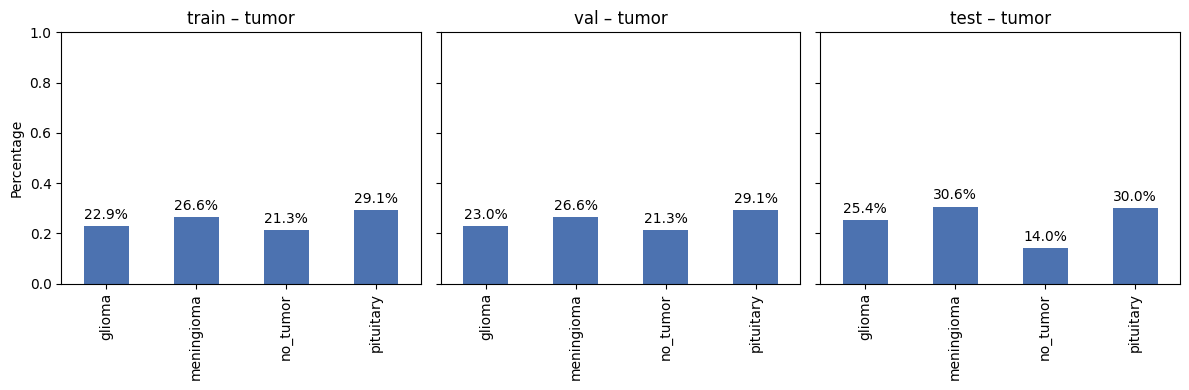

In [4]:
import matplotlib.pyplot as plt

dfs = {"train": train_df, "val": val_df, "test": test_df}
column = "tumor"

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

for ax, (split_name, df) in zip(axes, dfs.items()):
    counts = df[column].value_counts(normalize=True).sort_index()
    counts.plot(kind="bar", ax=ax, color="#4C72B0")

    ax.set_title(f"{split_name} – {column}")
    ax.set_xlabel("")
    ax.set_ylabel("Percentage")
    ax.set_ylim(0, 1)
    ax.bar_label(ax.containers[0], fmt="{:.1%}", padding=3)

plt.tight_layout()
plt.show()


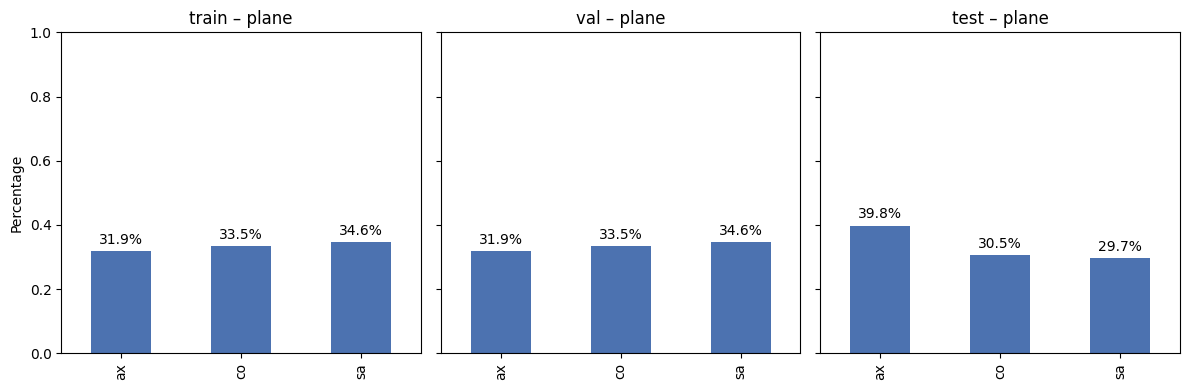

In [5]:
import matplotlib.pyplot as plt

dfs = {"train": train_df, "val": val_df, "test": test_df}
column = "plane"

fig, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)

for ax, (split_name, df) in zip(axes, dfs.items()):
    counts = df[column].value_counts(normalize=True).sort_index()
    counts.plot(kind="bar", ax=ax, color="#4C72B0")

    ax.set_title(f"{split_name} – {column}")
    ax.set_xlabel("")
    ax.set_ylabel("Percentage")
    ax.set_ylim(0, 1)
    ax.bar_label(ax.containers[0], fmt="{:.1%}", padding=3)

plt.tight_layout()
plt.show()


In [6]:
train_set, val_set, test_set = build_datasets_from_manifest(
    manifest_path=manifest_path,
    base_dir=base_dir,
    train_split_value="train",
    test_split_value="test",
    val_fraction=0.2,
    stratify_columns=("tumor", "plane"),
    random_state=42,
)

len(train_set), len(val_set), len(test_set)

(4000, 1000, 1000)

In [7]:
sample_idx = 0
image, label = train_set[sample_idx]

print(f"Sample {sample_idx} => tensor shape: {tuple(image.shape)}, label: {label}")

OSError: [Errno 35] Resource deadlock avoided